<b><font size="6">Logistic Regression</font><a class="anchor"><a id='toc'></a></b><br>
    
Logistic Regression is a statistic model for classification problems. 
Just like in linear regression, features are linearly scaled, instead of predicting the binary outcome directly, logistic regression predicts the log-odds of the outcome, which is the logarithm of the odds that an event occurs. 
However, the results of scaling are then used as an input to the __logistic function (sigmoid function)__ . 

Said function will transform each resunt into a probability, and the corresponding observation will be classified according to that probability. 

$$\sigma(r(X)) = \frac{1}{1+e^{-r(X)}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n)}}$$
- $r(X)$ being the result of the linear regression.

For this model to work in multinomial classification, multiple logistic regresions are needed, one for each possible class.
    
Before anything else, let's plot a Logistic Regression.
    
## 1. Plotting
    
**1. Import `pandas` as `pd`, `matplotlib.pyplot` as `plt`, import `numpy` as `np`, from `sklearn.model_selection` import `train_test_split`, and from `sklearn.metrics` import `r2_score`, `mean_absolute_error`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split


**2. Import the `iris.csv` dataset**

In [2]:
iris = pd.read_csv('datasets/iris.csv')

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**3. Store the 'SepalLengthCm' feature from the newly imported dataset in a varible called 'X', and store the target feature ('Target') in a variable called 'y'**

In [4]:
X = iris['SepalLengthCm']
y = iris['Target']

**4. Run the next cell to plot a Logistic Regression**

<Axes: xlabel='SepalLengthCm', ylabel='Target'>

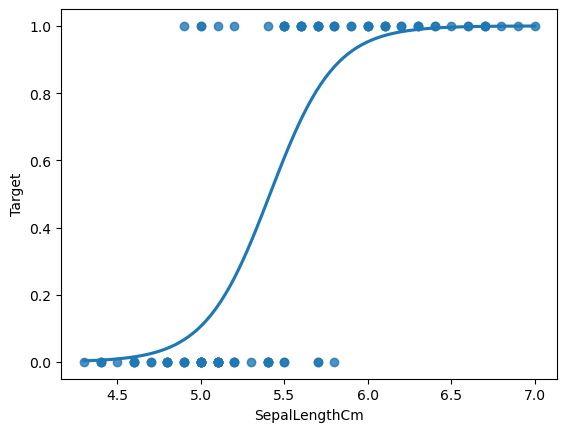

In [5]:
import seaborn as sns

sns.regplot(x=X, y=y, data=iris, logistic=True, ci=None)


As seen here, the logistic regression curve emphasizes the difference between the 2 classes. Any value that is lower than a 0.5 in the logistic regression is seen as a 0, and any value that is higher than a 0.5 is seen as a 1.<br>

With that done, let's try the sklearn built-in model for Loistic Regression

## 1. Data preparation

**1. Import your ddata from `pData.xlsx` and Check the data for missing values and data types(pData.info())**

In [6]:
pData = pd.read_excel('datasets/pData.xlsx')


In [7]:
pData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      8000 non-null   int64
 1   DF1     8000 non-null   int64
 2   DF2     8000 non-null   int64
 3   DF3     8000 non-null   int64
 4   DF4     8000 non-null   int64
 5   DF5     8000 non-null   int64
 6   DF6     8000 non-null   int64
 7   DF7     8000 non-null   int64
 8   DF8     8000 non-null   int64
 9   DF9     8000 non-null   int64
 10  Buys    8000 non-null   int64
dtypes: int64(11)
memory usage: 687.6 KB


**2. Get the data's descriptive statistics**

In [8]:
pData.describe()

,ID,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,Buys
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5991.857125,14.658000,0.471250,623.507375,898.653500,0.417500,16.736000,48.027250,62.129375,69974.713500,0.067125
std,2885.399268,11.937173,0.499204,645.552196,202.201258,0.493178,1.871161,17.236775,68.382890,27540.800759,0.250254
min,1001.000000,1.000000,0.000000,6.000000,550.000000,0.000000,12.000000,18.000000,0.000000,10000.000000,0.000000
25%,3487.750000,4.000000,0.000000,63.000000,723.000000,0.000000,15.000000,33.000000,26.000000,47841.500000,0.000000
50%,6016.500000,12.000000,0.000000,385.500000,894.000000,0.000000,17.000000,48.000000,53.000000,70176.000000,0.000000
75%,8472.250000,24.000000,1.000000,1076.000000,1075.250000,1.000000,18.000000,63.000000,79.000000,92076.250000,0.000000
max,10999.000000,56.000000,1.000000,3052.000000,1250.000000,1.000000,20.000000,78.000000,549.000000,139730.000000,1.000000


**3. Get the correlation between every variable**


In [9]:
pData.corr(method = 'pearson')

,ID,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,Buys
ID,1.000000,-0.001996,0.003126,-0.001779,-0.002832,-0.003776,0.002258,-0.004164,0.003035,0.002463,-0.008004
DF1,-0.001996,1.000000,-0.196105,0.993493,0.175181,-0.580908,0.123383,0.832595,-0.192742,0.866078,0.404369
DF2,0.003126,-0.196105,1.000000,-0.228422,0.024719,-0.057875,0.098274,0.011874,-0.036028,0.007334,-0.149166
DF3,-0.001779,0.993493,-0.228422,1.000000,0.175209,-0.555803,0.114784,0.812958,-0.156885,0.847853,0.422609
DF4,-0.002832,0.175181,0.024719,0.175209,1.000000,0.005322,0.001511,-0.017466,-0.038552,-0.022210,-0.008027
DF5,-0.003776,-0.580908,-0.057875,-0.555803,0.005322,1.000000,-0.079555,-0.616152,0.130524,-0.572986,-0.192657
DF6,0.002258,0.123383,0.098274,0.114784,0.001511,-0.079555,1.000000,0.201239,-0.046846,0.189563,0.028238
DF7,-0.004164,0.832595,0.011874,0.812958,-0.017466,-0.616152,0.201239,1.000000,-0.175111,0.933166,0.301568
DF8,0.003035,-0.192742,-0.036028,-0.156885,-0.038552,0.130524,-0.046846,-0.175111,1.000000,-0.178292,-0.037691
DF9,0.002463,0.866078,0.007334,0.847853,-0.022210,-0.572986,0.189563,0.933166,-0.178292,1.000000,0.324989


**4. Data partition**
- Assign all the variables excluding ID and Buys to the object `data`
- Assign the dependent variable (Buys) to the object `target`
- Import the needed library to make the partition of the dataset
- Split the data and the target to X_train, X_test, y_train, y_test, where `test_size` should be equal to 0.2, `random_state` equal to 5 the `stratify` equal to `target`

In [10]:
data = pData.drop(['ID','Buys'],axis=1)
target = pData['Buys']

In [11]:
#make the split here


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=5,stratify=target)

## 2. The Logistic Regressor

Let's start with a simple logistic regressor. No parameter tweaking.

**1. Import the model and create an instance. Save the instance in a variable called `logr`** 


Documentation: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression(fit_intercept=True,...)</a>



In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logr = LogisticRegression()


**2. Fit the first instance of the model to the train data** 


<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression().fit(X,y,...)</a>


In [14]:
logr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**3. Use the model to predict the labels of the test data. Assign them to `y_pred`.**


<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression().predict(X)</a>




In [15]:
y_pred = logr.predict(X_test)


In [16]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

***Note:*** You can get the actual probabilities of each sample instead of the assigned class using the method predict_proba()

In [17]:
pred_prob = logr.predict_proba(X_test)


In [18]:
pred_prob 

array([[0.9938137 , 0.0061863 ],
       [0.9843761 , 0.0156239 ],
       [0.98149162, 0.01850838],
       ...,
       [0.9804619 , 0.0195381 ],
       [0.82812496, 0.17187504],
       [0.98574385, 0.01425615]])

***Note:*** In the same way as for the linear regression, you can get the coefficients and intercept

**4. Create another instance, with `penalty = 'l1'` and `solver = 'liblinear'`**

In [19]:
log_l1 = LogisticRegression(penalty = 'l1',solver = 'liblinear')

**Note:** only the "saga" solver can support the elasticnet penalty.

Supported penalties by solver:
* "newton-cg" - "l2", none
* "lbfgs" - "l2", none
* "liblinear" - "l1", "l2"
* "sag" - "l2", none
* "saga" - "elasticnet", "l1", "l2", none

**5. Fit this instance of the model to the train data** 



In [20]:
log_l1.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

**6. Use the new model to predict the labels of the test data. Assign them to `y_pred_l1`.**

In [21]:
y_pred_l1 = log_l1.predict(X_test)

**7. Create another instance of the model, with `penalty = 'elasticnet'`, `solver = 'saga'`, and `l1_ratio = 0.5`**

In [22]:
log_en = LogisticRegression(penalty = 'elasticnet',solver='saga',l1_ratio =0.5)

**8. Fit this instance of the model to the train data** 

In [23]:
log_en.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

**9. Use the new model to predict the labels of the test data. Assign them to `y_pred_en`.**

In [24]:
y_pred_en = log_en.predict(X_test)

***Note:*** Since we are predicting a categorical target (classification) we use other metrics to evaluate our model than if we were solving a regression problem. Also, for the logistic regression the R-squared cannot be obtained in the same way as we obtain it in the linear case.

### 2.2. The attributes

<b>Regression coefficients: </b>``.coef_``</a>




<b>10. To check the coefficients calculated by applying the linear regression, call the attribute `coef_` associated to each of your models.</b>

In [28]:
logr.coef_

array([[ 4.16850058e-03,  2.93666206e-04,  3.38760706e-03,
        -3.42198465e-03, -3.05208961e-03, -3.82185796e-02,
        -3.60296848e-02, -6.04929554e-04, -6.85123394e-06]])

In [29]:
log_l1.coef_

array([[ 5.97288478e-02, -3.43486285e-02,  2.02337295e-03,
        -2.58109544e-03, -3.64143007e-01, -3.13974996e-02,
        -1.36871503e-02,  1.37664960e-03, -7.15357198e-06]])

In [30]:
log_en.coef_

array([[ 3.61097467e-05, -1.62697614e-06,  2.42380551e-03,
        -1.88816656e-03, -2.38772644e-06, -3.48961721e-05,
        -1.78093275e-05, -1.79916190e-04, -3.59261162e-05]])

Like in Linear Regression, in order to better understand what is the variable associated to each coefficient, let's convert the result to a DataFrame and define as headers the variables.

<b>11. Create a dataframe that will contain the values of the coefficients for your default model (the one without parameters). But use ._coef[0] to get the coefficient array, WITHOUT it being inside another array. Set ``columns = ['default'].`` 

In [31]:
logr.coef_[0]

array([ 4.16850058e-03,  2.93666206e-04,  3.38760706e-03, -3.42198465e-03,
       -3.05208961e-03, -3.82185796e-02, -3.60296848e-02, -6.04929554e-04,
       -6.85123394e-06])

In [32]:
df_basic = pd.DataFrame(logr.coef_[0],columns = ['default'])
df_basic

,default
0,0.004169
1,0.000294
2,0.003388
3,-0.003422
4,-0.003052
5,-0.038219
6,-0.036030
7,-0.000605
8,-0.000007


In [33]:
data.head()

,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9
0,29,0,1402,789,0,16,68,66,90782
1,31,0,1537,623,0,20,78,6,113023
2,4,0,44,583,1,18,24,69,28344
3,21,1,888,893,0,19,59,10,93571
4,5,1,56,792,1,20,32,65,22386


<b>12. Create a dataframe that will contain the values of the coefficients for your model using 'log_l1'. But use ._coef[0] to get the coefficient array, WITHOUT it being inside another array. Set ``columns = ['log_l1'].`` 

In [34]:
df_l1 = pd.DataFrame(log_l1.coef_[0],columns = ['log_l1'])

<b>13. Create a dataframe that will contain the values of the coefficients for your model using 'elasticnet'. But use ._coef[0] to get the coefficient array, WITHOUT it being inside another array. Set ``columns = ['elasticnet'].`` 

In [35]:
df_en = pd.DataFrame(log_en.coef_[0],columns = ['log_en'])

<b>14. Run the cell below to join the three Dataframes you created using the ``.join()`` method

In [36]:
df = df_basic.join(df_l1).join(df_en)
df

,default,log_l1,log_en
0,0.004169,0.059729,0.000036
1,0.000294,-0.034349,-0.000002
2,0.003388,0.002023,0.002424
3,-0.003422,-0.002581,-0.001888
4,-0.003052,-0.364143,-0.000002
5,-0.038219,-0.031397,-0.000035
6,-0.036030,-0.013687,-0.000018
7,-0.000605,0.001377,-0.000180
8,-0.000007,-0.000007,-0.000036


<b>15. By using the method `set_index()`, define the index of your composite Dataframe equal to the name of the features (you can get the feature names with `X_train.columns`)

In [37]:
df.set_index(X_train.columns)

,default,log_l1,log_en
DF1,0.004169,0.059729,0.000036
DF2,0.000294,-0.034349,-0.000002
DF3,0.003388,0.002023,0.002424
DF4,-0.003422,-0.002581,-0.001888
DF5,-0.003052,-0.364143,-0.000002
DF6,-0.038219,-0.031397,-0.000035
DF7,-0.036030,-0.013687,-0.000018
DF8,-0.000605,0.001377,-0.000180
DF9,-0.000007,-0.000007,-0.000036


<b>The independent term: </b>``.intercept_``



<b>14. To obtain the intercept of each regression, call the attribute `intercept_` associated to each of your models

In [38]:
logr.intercept_

array([-0.00238138])

In [39]:
log_l1.intercept_

array([-2.00697256])

In [40]:
log_en.intercept_

array([-2.17807405e-06])



## 3. Evaluation

Now it's finally time to compare our logistic regressions. Using different parameters may lead to better results sometimes, and worse results in other times.<br>
The metric used will be:

- accuracy score: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score'>sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True,...)</a>


**1. From `sklearn.metrics` import `accuracy_score`** 

In [41]:
from sklearn.metrics import accuracy_score

**The accuracy score:**

![accuracy](./images/accuracy.PNG)

**2. Get the accuracy scores for all 3 models with `accuracy_score(y_test,predictions)`. Then, get predictions and accuracy scores for your training data, and compare the training data scores with the test data scores** 

Option: use `model.score(X_validation_set , y_validation_set)`

Default model:

In [42]:
#Train:
y_pred_tr = logr.predict(X_train)
accuracy_score(y_train,y_pred_tr)

0.936875

In [43]:
accuracy_score(y_test, y_pred)

0.933125

In [44]:
#other option
logr.score(X_test, y_test)

0.933125

Note the last 2 values are exactly the same.

Model 2:

In [45]:
#Train
y_pred_l1_tr = log_l1.predict(X_train)
accuracy_score(y_train,y_pred_l1_tr)

0.93859375

In [46]:
accuracy_score(y_test,y_pred_l1)

0.933125

Model 3:

In [47]:
#Train:
y_pred_en_tr = log_en.predict(X_train)
accuracy_score(y_train,y_pred_en_tr)

0.9340625

In [48]:
accuracy_score(y_test,y_pred_en)

0.936875